## A Brief Exploration of Porn Statistics
Maria Platas, Alieldin Ramadan, Jaume Vicens
November 2019 - Ironhack Barcelona

## Introduction
Porn is one of the most controversial elements in today's Internet. Known by most but openly admitted by a very few. Porn websites are source of huge, enormous databases of content, categories, users and algorithms that can be compared to the ones from most accessible sites like Youtube or Facebook. 

This umbrageous, but at the same time vast and interesting topic seemed perfect to be analyzed to have a better understanding of an unknown but still very big part the current consumption of internet.

We are currently halfway the completion of the Data Analytics Bootcamp, a 9-weeks full-time course where Python, SQL, Pandas and Tableau are covered, and these tools together make a difference when trying to analyze the available data.

In order to understand a bit better porn statistics, type of content and currents, we had a few questions we wanted to answer:
1. Which are the main categories, or tags used at porn sites?
2. Which are the most popular categories, and which ones have more content?
3. Which are the best rated categories?
4. Is there a correlation between the number of videos that a category has and the average views per video?

## Datasets
For this project, we used three different sources to get the most diverse and complete information possible:
1. **Redtube Api** [api.redtube.com] The official Redtube Api, which allowed a maximum of 30000 requests per day. 51901 rows of data.
2. **Pornhub Database, csv file** from Kaggle [www.kaggle.com], with 191532 rows of data.
3. **Xhamster Database, csv file** from Sexualitics [https://sexualitics.github.io/] with 785119 rows of data which we limited to 100000 for easy manipulation.

The information decided to use and manage is the following:
[Video title]: Name of the video.
[Number of views]: Accumulated amount of views per video.
[Rating]: Average rating per video, from 0.0 to 1000
[Category 1]: Category or tag of the video.
[Category 2]: Second category of the video.
[Category 3]: Third category of the video.
[Website]: Source of the video *Either Redtube, Pornhub, Xhamster. 
*A video has always a designated category [Category_1] but can also have others [Category_2] and [Category_3] which are optional. The original dataset varies from 1 to 20 categories in one video. We decided to limit it to three to standarize it.


## Data Wrangling
Each database was accessed, wrangled and cleaned separately to create an uniform database aligned with the relevant needed data.

In [18]:
#Needed libraries, adapting path and ignoring scientific notation
import json
import requests
import pandas as pd
import numpy as np
import random
import sqlalchemy
from IPython.display import Image
import os
pd.options.display.float_format = '{:.1f}'.format

## Redtube API

In [3]:
with open('Redtube_list.txt', 'r') as filehandle:
    df = json.load(filehandle)
    
video = []
for i in df:
    for key, value in i.items():
        if key == 'video':
            video.append(value)

views = np.array([])
rating = np.array([])
titles = np.array([])

for dict1 in video:
    for key1, value1 in dict1.items():
        if key1 == 'views':
            views = np.append(views, np.array([value1]))
        elif key1 == 'rating':
            rating = np.append(rating, np.array([value1]))
        elif key1 == 'title':
            titles = np.append(titles, np.array([value1]))

categories = pd.DataFrame(tags)

arrays = {'Title': titles, 'Number_of_Views': views, 'Rating': rating}
table = pd.DataFrame(data=arrays
                     
rt_table = pd.merge(table, categories, left_index=True, right_index=True)
                     
rt_table['Website'] = 'Redtube'
                     
rt_table = full_table.astype({'Title': str, 'Number_of_Views': int, 'Rating': float, 'Category_1': str, 'Category_2': str, 'Category_3': str, 'Website': str})
                     
rt_table.info()

rt_table.head()

## Pornhub CSV

In [ ]:
#Access to database and first sight.
ph = pd.read_csv('/Users/Maria/Desktop/tumbzilla_labels.csv', index_col = 0)
ph.columns

#Taking out unneeded columns
ph.drop(['img_source', 'video_link','tags', 'length', 'quality' ], axis = 1, inplace=True)

def cast_to_list(categories):
    if pd.isnull(categories):
        return categories
    return [item.strip() for item in categories.split("__")]

ph['categories']= ph['categories'].apply(cast_to_list)

categories = ph['categories'].apply(pd.Series
categories.drop(columns = [3,4,5,6,7,8,9,10,11], inplace = True)
categories.rename(columns = {0:'Category_1', 1:'Category_2', 2:'Category_3'}, inplace = True)
                                                                     
ph_merged = ph.merge(right = categories, left_index = True, right_index=True)
ph_merged['Website'] = "Pornhub"
ph_merged.rename(columns = {'nb_views':'Number_of_Views','title':'Title','voting':'Rating'}, inplace = True)     
ph_merged = ph_merged[['Title', 'Number_of_Views', 'Rating', 'Category_1', 'Category_2', 'Category_3', 'Website']]   
                                    
ph_merged.head()                            

## xHamster CSV

In [ ]:
#Xhamster dataset comes from https://sexualitics.github.io/ which contains 786120 rows containing videos' data.
#We select the columns we are interested in.
df = pd.read_csv('../../xhamster.csv')
df_clean = df[['id','title','channels','nb_views']]
df_clean = df_clean[df_clean['channels'].notnull()]
df_clean = df_clean['channels'].apply(pd.Series)

#The category column contains all the categories together, divided by a coma.
#In order to split the strings inside the column 'category' we do it separately:
three_cat = df_new2[0].str.split(pat=',', n=4, expand=True)
cat1 = pd.DataFrame(three_cat[0].str.strip(to_strip="[,'] \n")) 
cat2 = pd.DataFrame(three_cat[1].str.strip(to_strip="[,'] \n")) 
cat3 = pd.DataFrame(three_cat[2].str.strip(to_strip="[,'] \n"))

#We create the ultimate cleaned database by taking the original df table
xh_table = df[['title','nb_views','channels']]
xh_table = xh_table[df_real['channels'].notnull()]

#We append the cleaned Category columns to the ultimate chart
xh_table['Category_1'] = cat1
xh_table['Category_2'] = cat2
xh_table['Category_3'] = cat3
xh_table.drop('channels',axis=1,inplace=True)
xh_table['Website'] = 'Xhamster'

#As agreed with the team, we rename the columns by convention
xh_table = xh_table.rename(columns={'title': 'Title', 'nb_views': 'Number_of_Views'})

#As the original cleaned dataset is 700000 rows, we limit it to 100000 most viewed ones
xh_100 = xh_table.sort_values('Number_of_Views',ascending=False)
xh_100 = xh_100.head(100000)
xh_100 = xh_100.drop('channels',axis=1)
xh_100.head()

## The Category Table Dilemma
With above actions, we made it to merge three different sources into one single dataset with a total of 342820 rows, with the information we needed to analyze. But when the analysis through Tableau started, we noticed some biased information as we ignored [Category_2] and [Category_3] elements. 
For this reason, we decided to create another dataset where we combined the elements in the categories in the three columns, so we could get a better overview of their elements.

At the same time, some categories had similar names which we could consider as duplicates -for example: 'Anal sex' and 'Anal' could count as the same one, or 'Lesbian' and 'Lesbians'-. An extra layer of cleaning was needed.

In [16]:
#We proceed to play with The Video Dataset to get the right Category Dataset.
df = pd.read_csv(".\\databases\\1_videos_combined_dataset.csv", encoding='utf8', sep=";", index_col = 0,low_memory=False)

#We start by grouping by 'Category_1'
df_g = pd.DataFrame(df.groupby('Category_1', as_index = False).count())
df_g.drop(columns = ['Number_of_Views', 'Rating', 'Category_2', 'Category_3','Website', 'Unnamed: 8'], inplace = True)

#We get each category and the total count of elements that have them as 'Category 1'
df_g.columns = ['Category', 'Count1']
df_g['Count1'].sum()

#Repeat the process for 'Category 2' and 'Category 3'
df_g2 = pd.DataFrame(df.groupby('Category_2', as_index = False).count())
df_g2.drop(columns = ['Number_of_Views', 'Rating', 'Category_1', 'Category_3','Website', 'Unnamed: 8'], inplace = True)
df_g2.columns = ['Category', 'Count2']

df_g3 = pd.DataFrame(df.groupby('Category_3', as_index = False).count())
df_g3.drop(columns = ['Number_of_Views', 'Rating', 'Category_1', 'Category_2','Website', 'Unnamed: 8'], inplace = True)
df_g3.columns = ['Category', 'Count3']

#We proceed to merge
df_final_count0 = df_g.merge(df_g2, on='Category', how ='outer')
df_final = df_final_count0.merge(df_g3, on = 'Category', how ='outer')

#Replacing NaN for 0 and summing the counts
df_final.fillna(0, inplace = True)
df_final['Count_Total'] = df_final['Count1'] +  df_final['Count2'] +  df_final['Count3']

#Now we want to aggregate the number of views to get the total combined value and merge to the original one.
df_V = pd.DataFrame(df.groupby('Category_1', as_index = False).agg({'Number_of_Views':'sum','Rating':'mean'}))
df_V.columns = ['Category', 'Total_views', 'Avg_ratings']
df_final = df_final.merge(df_V, on = 'Category', how ='outer')
df_final.drop(columns = ['Count1', 'Count2', 'Count3'], inplace = True)


df_final.head()

,Category,Count_Total,Total_views,Avg_ratings
0,3D,40.0,2807189.0,71.7
1,60fps,315.0,36959579.0,73.0
2,69,501.0,81311080.0,80.2
3,Amateur,72524.0,15083247430.0,74.9
4,Anal,27357.0,4808210528.0,79.2


## The Master Datasets
### The Video Dataset
343433 rows from three different sources. Structured as following:
[Video title]: Name of the video. (String)
[Number of views]: Accumulated amount of views per video. (Float)
[Rating]: Average rating per video, from 0.0 to 1000. (Float)
[Category 1]: Category or tag of the video. (String)
[Category 2]: Second category of the video. (String)
[Category 3]: Third category of the video. (String)
[Website]: Source of the video *Either Redtube, Pornhub, Xhamster. (String)


### The Category Dataset
187 rows of unique categories extracted from [The Video Dataset]. Structured as following:
[Category]: Name of the category. (String)
[Count_Total]: Total number of elements -videos- in the category. (Float)
[Total_views_all]: Total number of views from each of the videos in the category. (Float)	[Avg_ratings_all]: Total ratings from each of the videos in the category. (Float)

# The Analysis
After cleaning the original three databases and creating the two Videos & Categories Datasets. We are able to proceed with the analysis.

## Part 1 - Initial questions
Understanding average of views

In [37]:
#We use the original df chart named as data
data = df

# Mean number of views for all the videos, from the three websites combined
"""
Each video from our population has an average of 355753 views
"""
round(data.Number_of_Views.mean(),2)

355752.99

In [36]:
# Mean number of views per website
web_mean = data.groupby("Website").mean()
"""
We can see how in the analyzed population, Pornhub has the most views and best rating.
Xhamster dataset did not include ratings, we are missing this information.
Redtube dataset has been made from random videos which can explain why the views is so low.
"""
web_mean

,Number_of_Views,Rating
Website,,
Pornhub,417811.5,77.5
Redtube,76306.6,73.9
Xhamster,381466.5,nan


In [38]:
#Which are the 20 most viewed videos on our dataset?
Top_20_videos = data.nlargest(20, 'Number_of_Views')
"""
The 20 most viewed videos are from Pornhub, the most viewed video by far is Kim Kardashian Sex Tape
with Ray J. Pornstar is a common category between the Top 20 views.
"""
Top_20_videos

,Title,Number_of_Views,Rating,Category_1,Category_2,Category_3,Website
index,,,,,,,
140407,Kim Kardashian Sex Tape with Ray J,113460000,67.0,Reality,HD,Ebony,Pornhub
141373,Ladies Touch Massage is Important,63000000,50.0,Massage,Small Tits,Brunette,Pornhub
43271,Kim K Sex Tape Part 2 - PornHub Exclusive,52130000,63.0,Pornstar,Interracial,Blowjob,Pornhub
17792,BFFS - Fooling around with my Step- Sister & F...,52050000,75.0,Pornstar,Cumshots,POV,Pornhub
10456,fucking hot,45660000,79.0,For Women,Pornstar,Big Ass,Pornhub
184607,Kimmy Granger Likes it Rough,43390000,77.0,Big Ass,Pornstar,Big Dick,Pornhub
56112,Teen Mom Farrah Abraham Sex Video,42970000,68.0,Blowjob,Celebrity,Exclusive,Pornhub
71350,Big Cock Hunter Babe,41000000,67.0,MILF,Big Dick,Hardcore,Pornhub
155363,Mofos - Teen needs a dick to distract her,40900000,73.0,Teen,HD,Pornstar,Pornhub


## Part 2 - Analysis on Categories 

#### Which are the categories with more videos?

In [49]:
#To read the combined csv with the categories to perform some analysis.
category = pd.read_csv("2_combined_category.csv", encoding='utf8', index_col = 0)

"""
The categories with more views are Pornstars, Amateur, HD, Teen 
but we see that rating do not seem to be aligned.
"""
category.sort_values('Total_views_all', ascending=False)

,Category,Count_Total,Total_views_all,Avg_ratings_all
136,Pornstars,57085.0,32448952824.0,39.7
3,Amateur,76886.0,25613377060.0,61.4
90,HD,52368.0,22133814842.0,75.6
168,Teen,42621.0,18471335787.0,38.5
19,Big Boobs,35126.0,13309635580.0,39.0
4,Anal,33894.0,11806648640.0,78.0
93,Hardcore,28199.0,10943142961.0,77.5
114,Mature,22507.0,10701496232.0,36.9
110,MILF,20262.0,8677352229.0,38.0
11,Babes,20744.0,7739066819.0,38.8


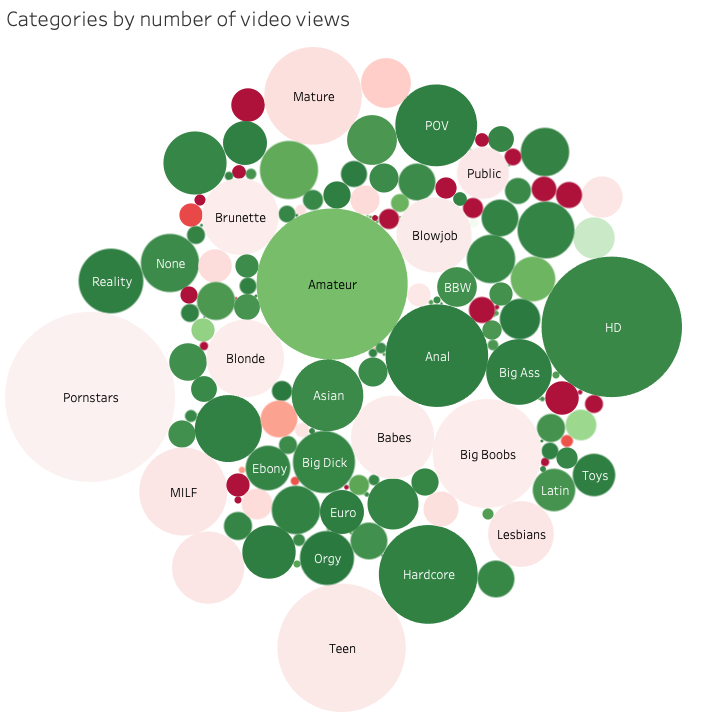

In [19]:
Image(".\\charts\\1Cat_by_views.png")

#### Is there a correlation between total number of videos and number of views?

In [111]:
# To get the correlation between the total number of videos and the number of views.

"""
There is a strong correlation
"""
category
category['Count_Total'].corr(category.Total_views_all)

0.912182637967947

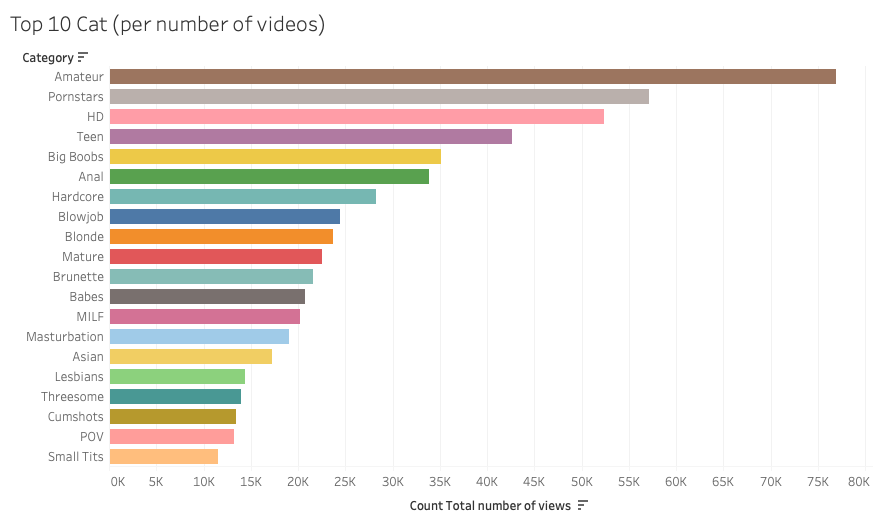

In [20]:
Image(".\\charts\\0Top_10_bycat_bynumber_views.png")

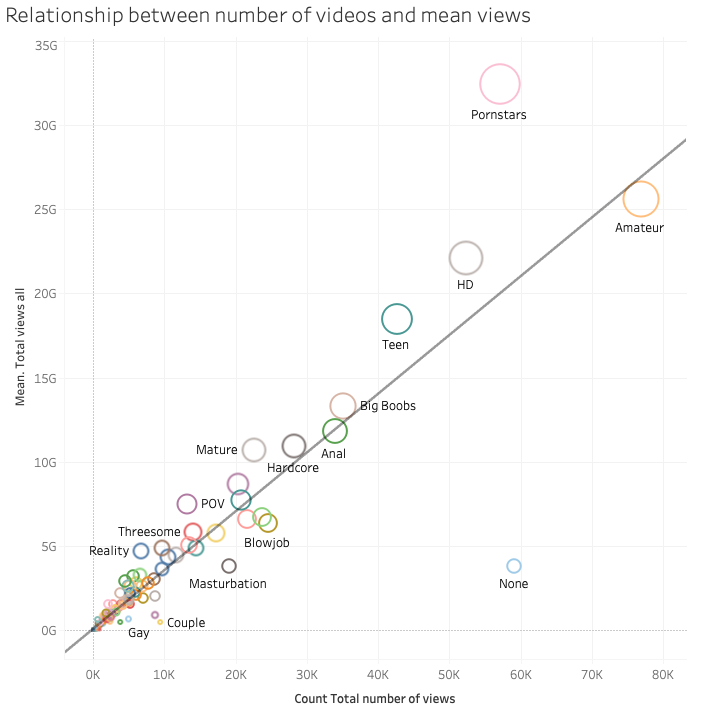

In [21]:
Image(".\\charts\\2Mean_Views_related_Total_videos.png")

# Conclusions

Porn is as big as diverse. As one of our TAs says: if you can imagine it, there is porn of it. Several learnings can be extracted from this research. Firstly, data extracted from data is not made to be human readible. There is lots of work on cleaning, adapting and improving readibility. Data manipulation covered most of our time in the project. 
Secondly, changing the approach when analyzing data does make a difference, so our data results changed when including second and third categories in our analysis, for this reason, it is very important not only to check the source of the data, but also to understand the approaches taken behind.
Thirdly, most popular categories are also the most viewed, there is a strong demand on popular categories.
Finally, as our first project of three people, aligning approaches and workflow, especially when coding, is difficult and requires empathy and patience, at the end, we got proven that teamwork has been the key of making this project reality, as complementing skills and strenghts do really make a difference.
